In [1]:
DATA_NAME = 'approx1e5-spaceNet-wavelet-gray' # size-name-transform-channel
sample_max = int(1e5)

In [2]:
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
path_dict = dict(zip(['size', 'name', 'transform', 'channel'], DATA_NAME.split("-")))
CWD = os.path.join(ROOT_DIR, os.path.join("results", "case-studies", path_dict['name'], path_dict['transform'], path_dict['size'], path_dict['channel']))
assert CWD == os.getcwd()
Path(os.path.join(CWD, "plots", "ksplots")).mkdir(exist_ok=True)
CWD

'/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/results/case-studies/spaceNet/wavelet/approx1e5/gray'

In [3]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *

os.chdir(CWD)
np.random.seed(0)

In [4]:
data_dir = os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}.pickle')
group_data_map = pd.read_pickle(data_dir)
GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)
full_params = pd.read_csv(Path(os.path.join(CWD, "CSVs", "optimized_params.csv")), index_col='layer')[["total_samples", "initial_r", "initial_eta", "kstest_stat_initial"]]
full_params["total_samples"] = full_params["total_samples"].astype(int)
full_params

total_samples  initial_r  initial_eta  kstest_stat_initial
layer                                                            
2              27208       0.21          0.0             0.020902
3             108832       0.09         -1.3             0.132440
4             333298       0.18         -0.9             0.077070
5            1149538       0.17         -1.1             0.042157
6            4251250       0.22         -1.0             0.023660
7           17005000       0.28         -1.0             0.018575
8           68020000       0.43         -1.0             0.012470
9          272080000       1.23         -1.0             0.016603

Testing Layer 2
Check Center Square
Center Square Passed


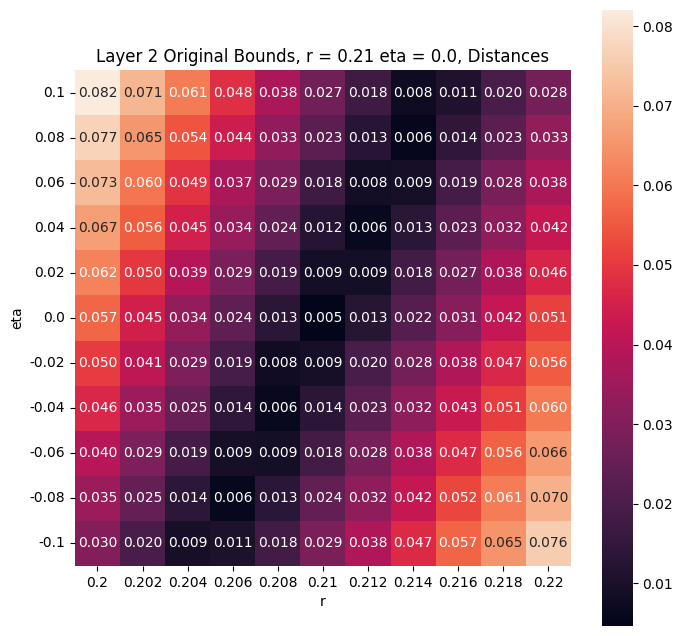

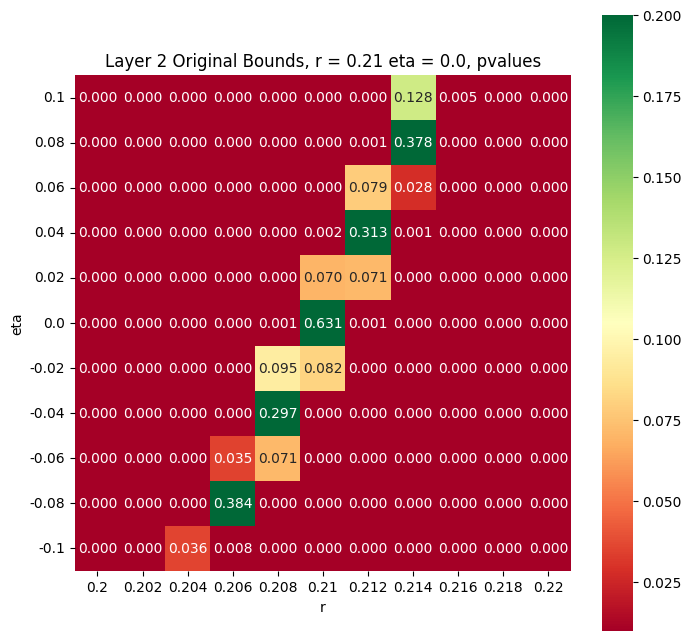

Running process with original bounds
Only 9.917355371900827% of tests passed with the original bounds. Now running with lower r and eta bounds
Trying r_bound = 0.001, eta_bound = 0.001
86.77685950413223% of tests passed using r_bound = 0.001, eta_bound = 0.01. Showing Heatmaps


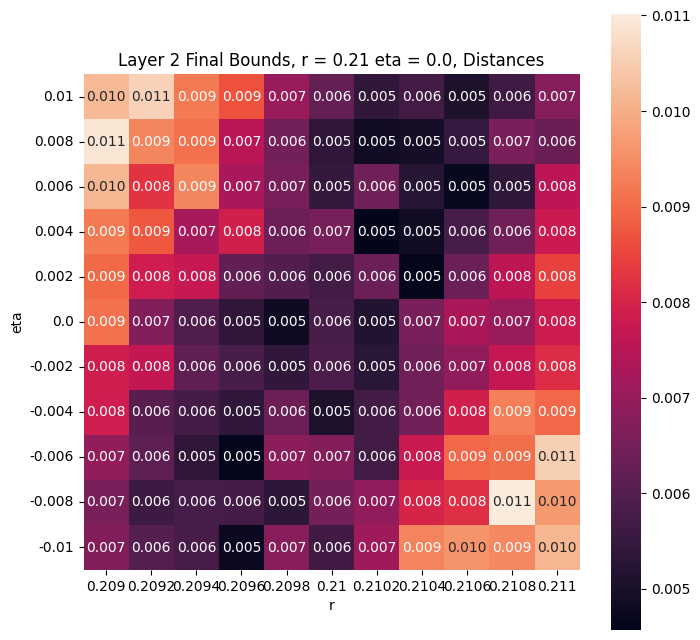

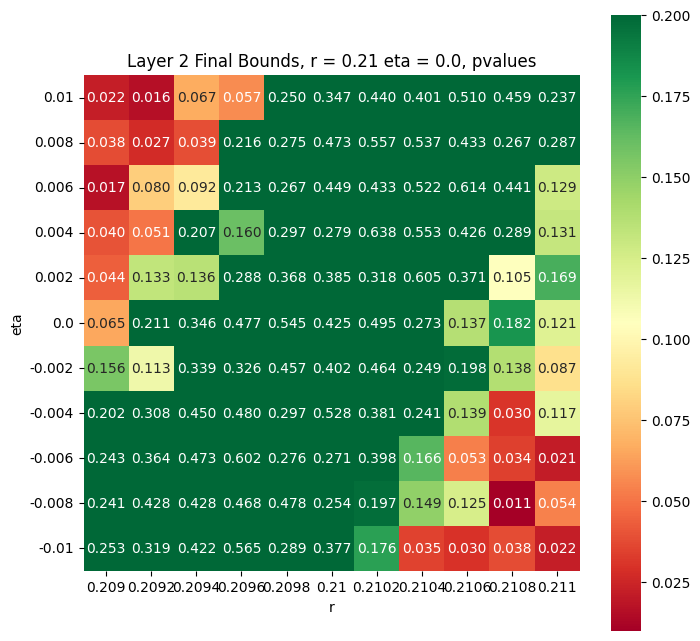

Testing Layer 3
Check Center Square
Center Square Passed


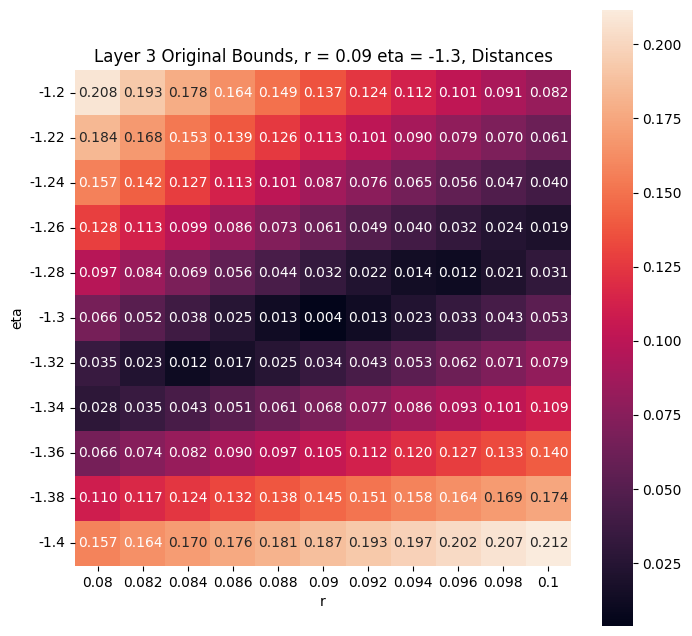

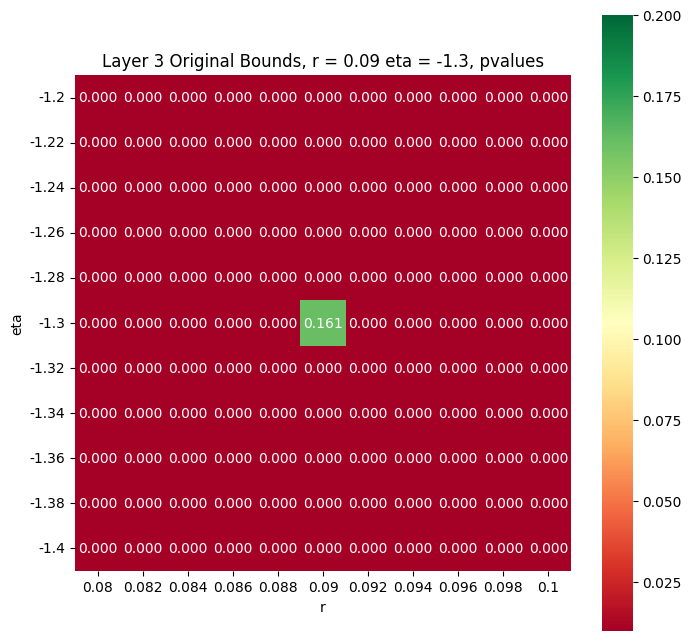

Running process with original bounds
Only 0.8264462809917356% of tests passed with the original bounds. Now running with lower r and eta bounds
Trying r_bound = 0.001, eta_bound = 0.001
Only 12.396694214876034% of tests passed using r_bound = 0.001, eta_bound = 0.01.Now running with lower r and eta bounds
Trying r_bound = 0.0001, eta_bound = 0.0001
100.0% of tests passed using r_bound = 0.0001, eta_bound = 0.001. Showing Heatmaps


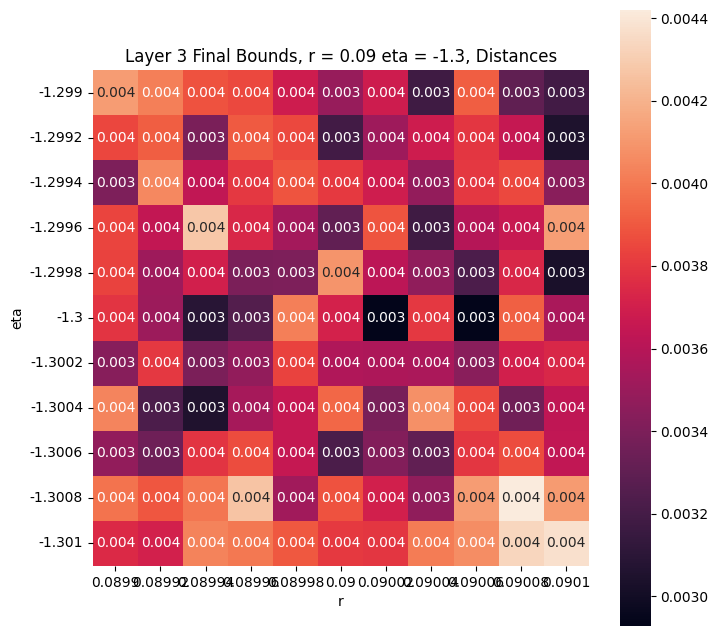

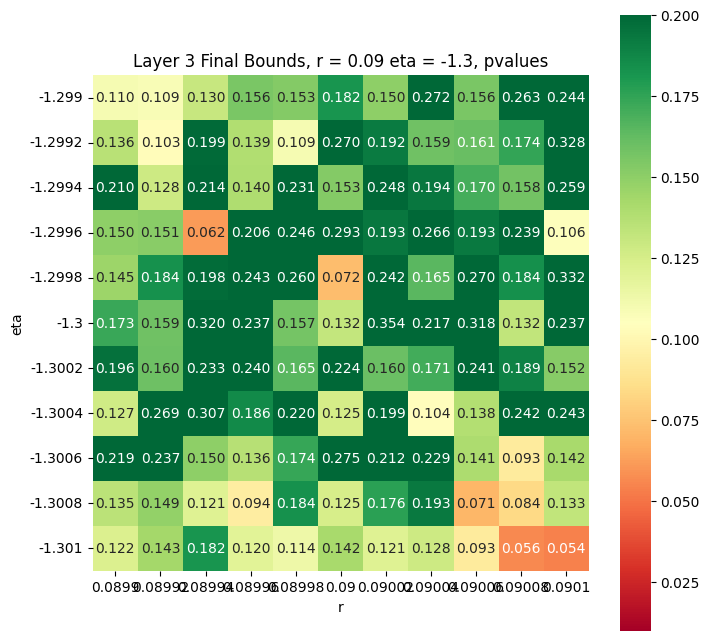

Testing Layer 4
Check Center Square
Center Square Passed


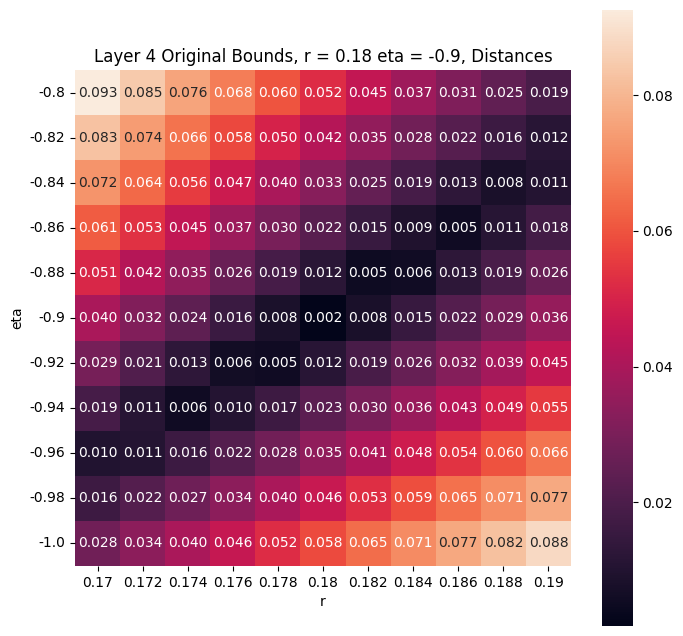

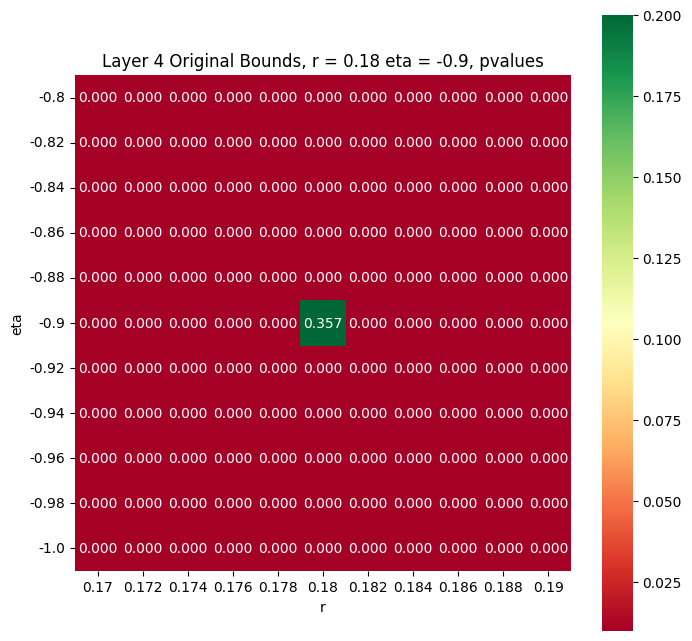

Running process with original bounds
Only 0.8264462809917356% of tests passed with the original bounds. Now running with lower r and eta bounds
Trying r_bound = 0.001, eta_bound = 0.001
Only 26.446280991735538% of tests passed using r_bound = 0.001, eta_bound = 0.01.Now running with lower r and eta bounds
Trying r_bound = 0.0001, eta_bound = 0.0001
100.0% of tests passed using r_bound = 0.0001, eta_bound = 0.001. Showing Heatmaps


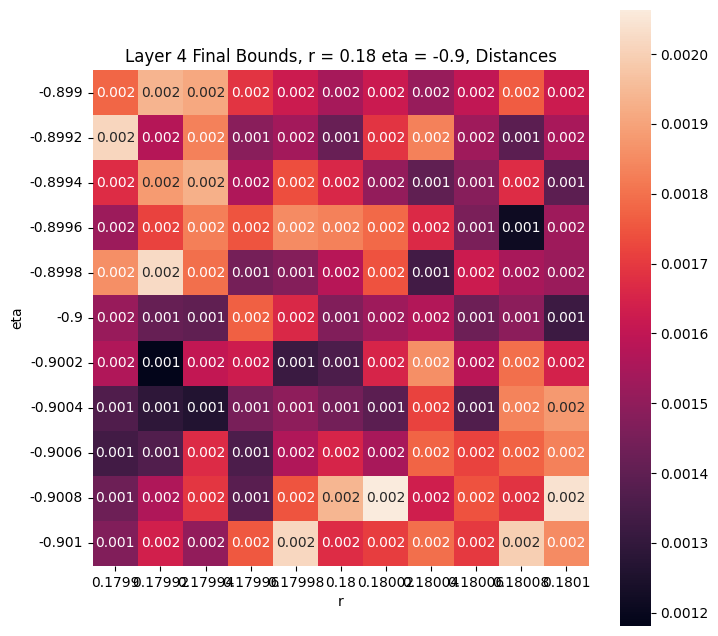

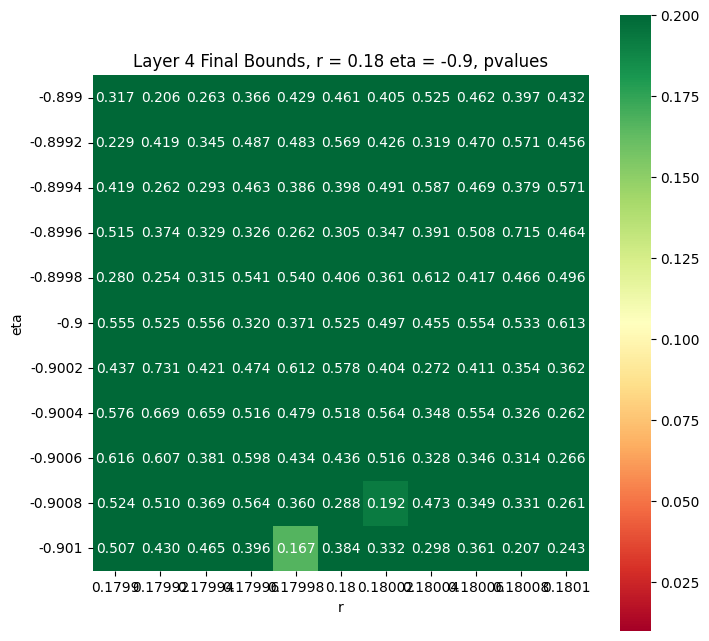

Testing Layer 5
Check Center Square
Center Square Passed


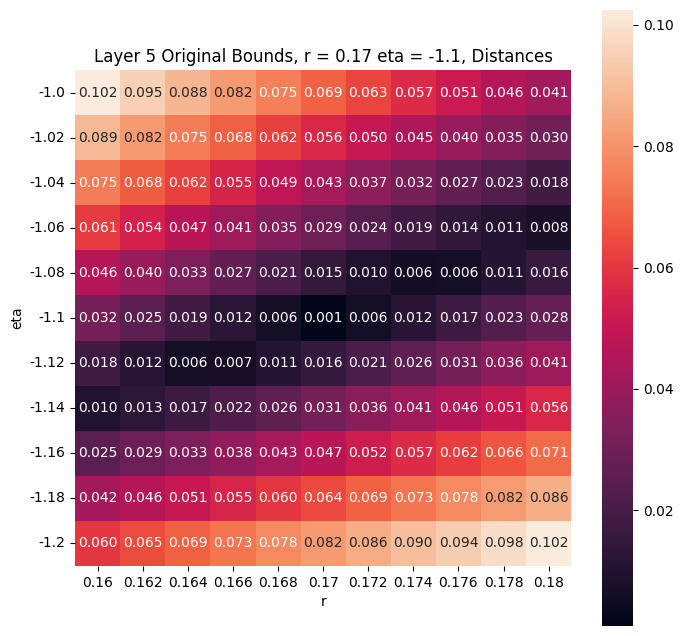

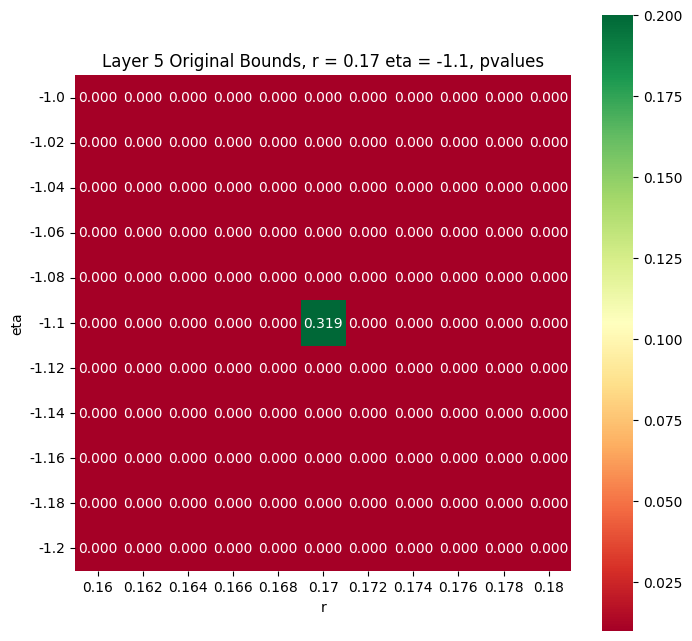

Running process with original bounds
Only 0.8264462809917356% of tests passed with the original bounds. Now running with lower r and eta bounds
Trying r_bound = 0.001, eta_bound = 0.001
Only 5.785123966942149% of tests passed using r_bound = 0.001, eta_bound = 0.01.Now running with lower r and eta bounds
Trying r_bound = 0.0001, eta_bound = 0.0001
91.73553719008265% of tests passed using r_bound = 0.0001, eta_bound = 0.001. Showing Heatmaps


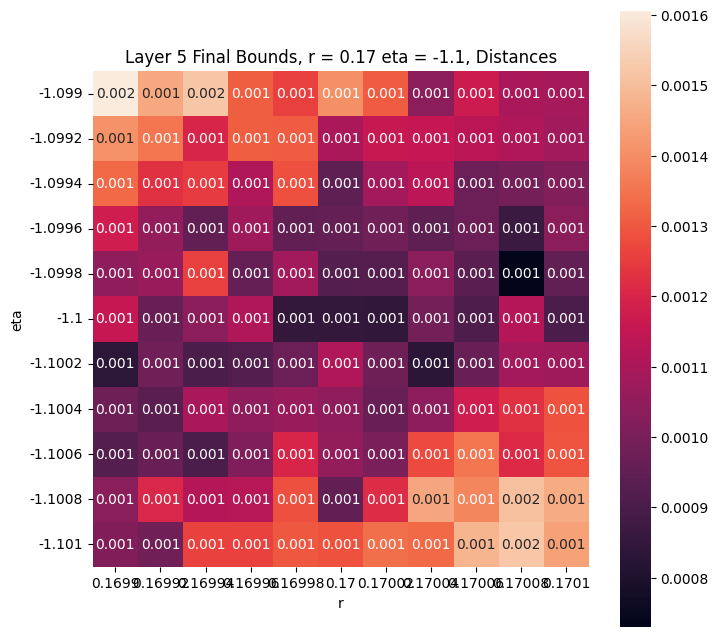

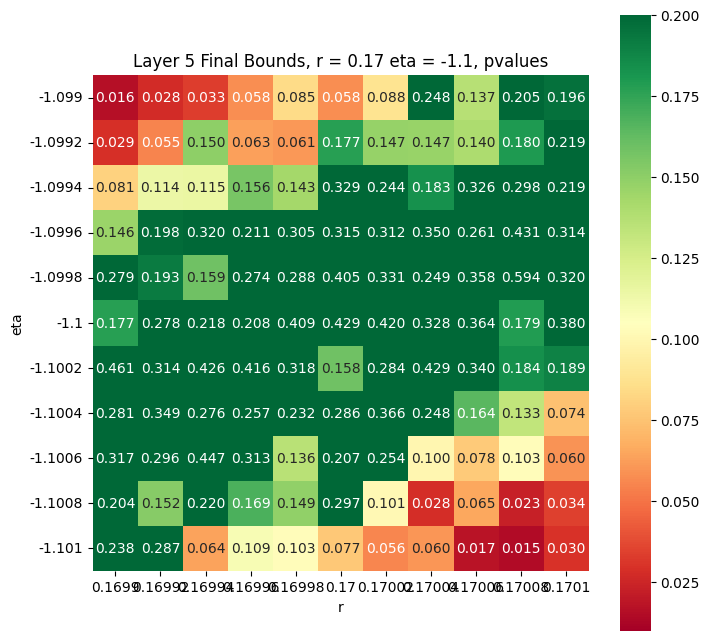

Testing Layer 6
Check Center Square
Center Square Passed


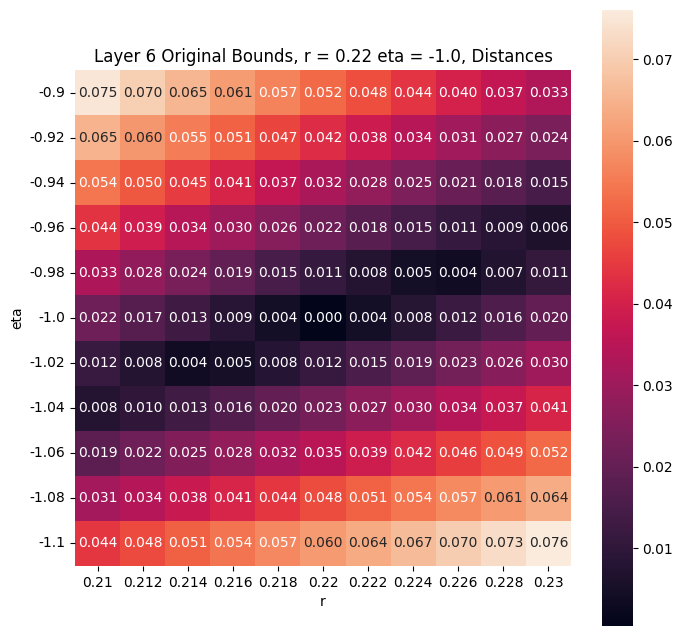

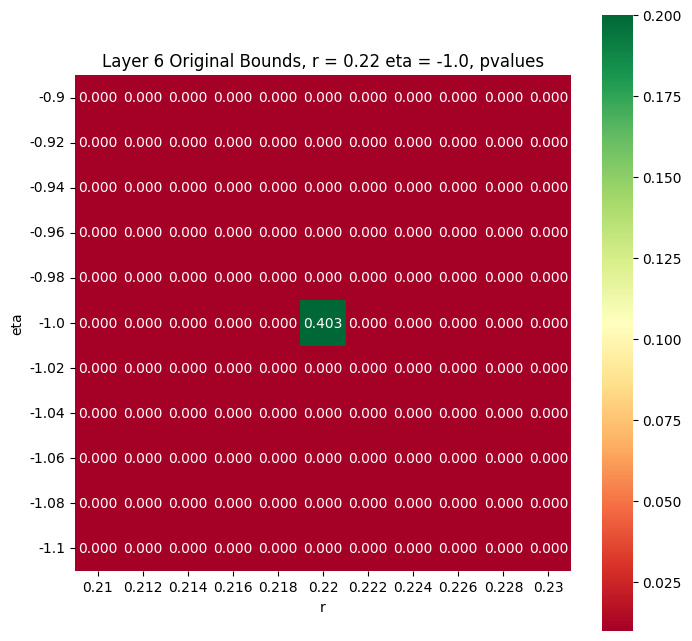

Running process with original bounds
Only 0.8264462809917356% of tests passed with the original bounds. Now running with lower r and eta bounds
Trying r_bound = 0.001, eta_bound = 0.001
Only 4.958677685950414% of tests passed using r_bound = 0.001, eta_bound = 0.01.Now running with lower r and eta bounds
Trying r_bound = 0.0001, eta_bound = 0.0001
Only 73.55371900826447% of tests passed using r_bound = 0.0001, eta_bound = 0.001.Now running with lower r and eta bounds
Trying r_bound = 1e-05, eta_bound = 1e-05
100.0% of tests passed using r_bound = 1e-05, eta_bound = 0.0001. Showing Heatmaps


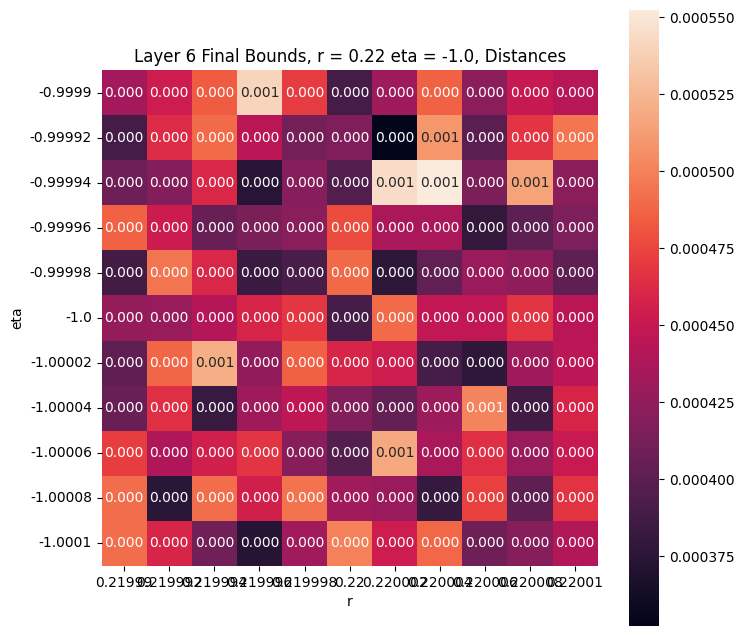

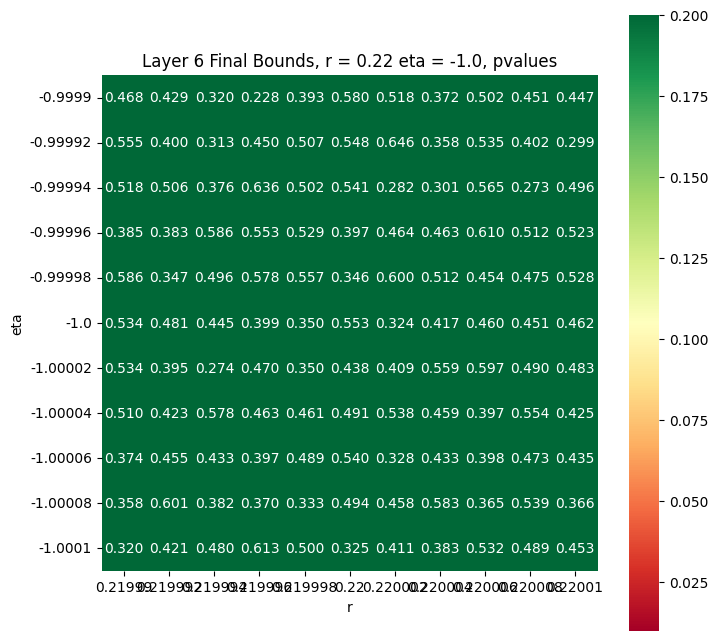

Testing Layer 7
Check Center Square
Center Square Passed


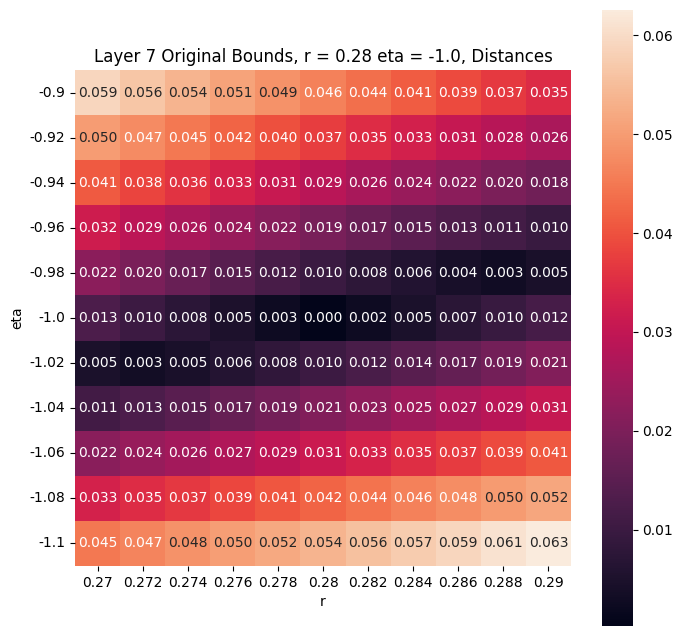

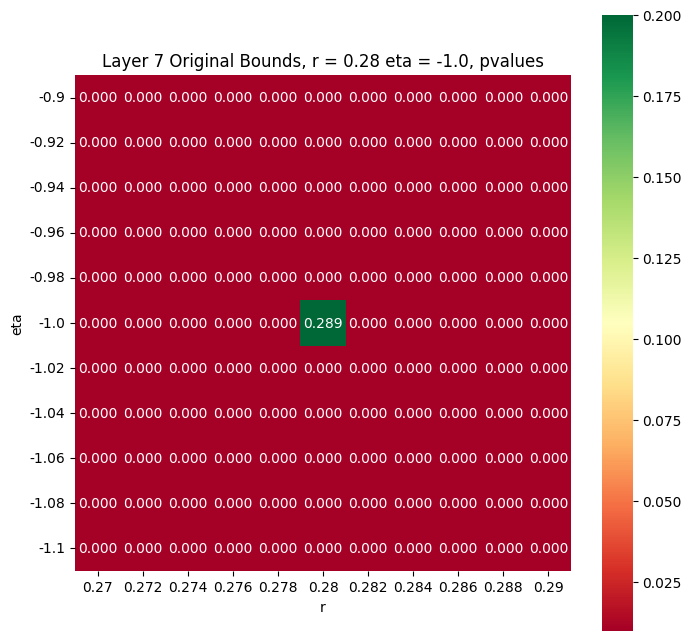

Running process with original bounds
Only 0.8264462809917356% of tests passed with the original bounds. Now running with lower r and eta bounds
Trying r_bound = 0.001, eta_bound = 0.001
Only 0.8264462809917356% of tests passed using r_bound = 0.001, eta_bound = 0.01.Now running with lower r and eta bounds
Trying r_bound = 0.0001, eta_bound = 0.0001
Only 37.1900826446281% of tests passed using r_bound = 0.0001, eta_bound = 0.001.Now running with lower r and eta bounds
Trying r_bound = 1e-05, eta_bound = 1e-05
100.0% of tests passed using r_bound = 1e-05, eta_bound = 0.0001. Showing Heatmaps


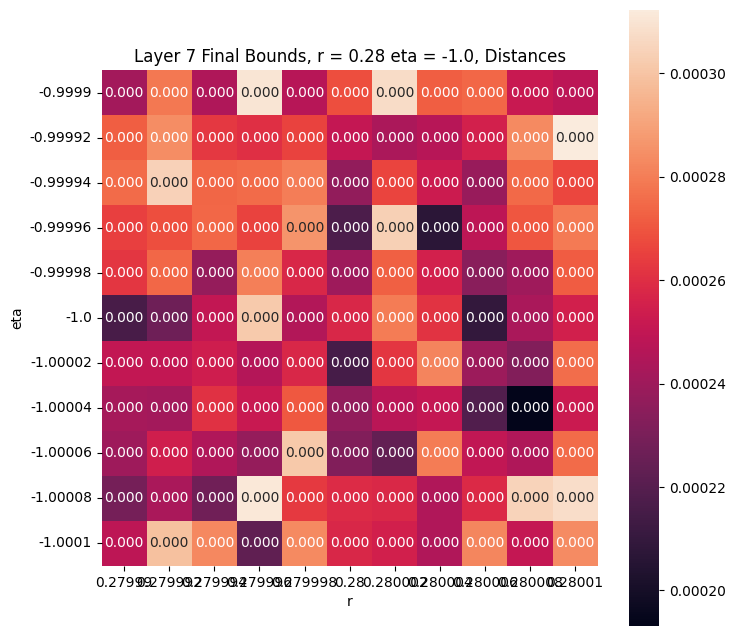

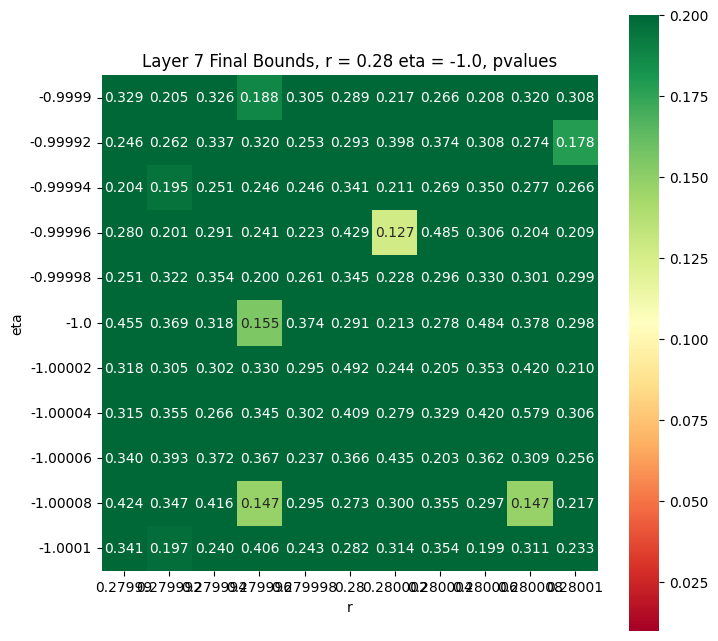

Testing Layer 8
Check Center Square
Center Square Failed No Need to test the rest
      r  eta  distance    pvalue
0  0.43 -1.0    0.0002  0.041035


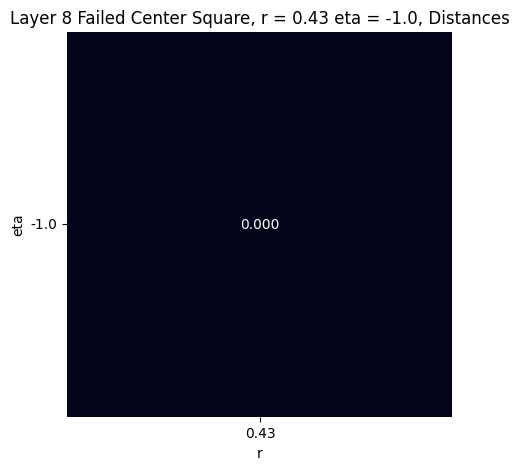

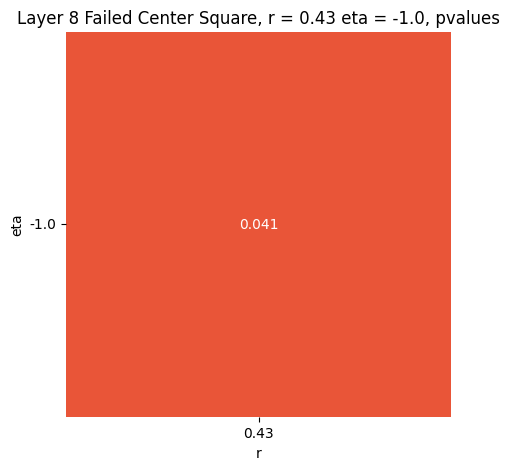

In [5]:
ks_output_df = pd.DataFrame(columns = ["layer", "inital_r_bound", "inital_eta_bound", "inital_pass_pct", "final_r_bound", "final_eta_bound", "final_pass_pct"])
for group in GROUPS[:-1]:
    print(f"Testing Layer {group}")
    figs, output = KSHeatMapFullProcess(r = full_params.loc[group, 'initial_r'], eta = full_params.loc[group, 'initial_eta'], n = full_params.loc[group, 'total_samples'], ks_max = sample_max, iterations = 10, r_bound = 0.01, eta_bound=0.1, grid_amt = 5, rounded = 8, title = f"Layer {group}", return_vals = True, max_iterations = 5, parallelize = True)
    figs[0][0].figure.savefig(os.path.join(CWD, "plots", "ksplots", f"ks_Plot_layer_{group}_initial_distances.jpg"), bbox_inches = 'tight', dpi=600)
    figs[0][1].figure.savefig(os.path.join(CWD, "plots", "ksplots", f"ks_plot_layer_{group}_initial_dvalues.jpg"), bbox_inches = 'tight', dpi=600)
    figs[1][0].figure.savefig(os.path.join(CWD, "plots", "ksplots", f"ks_plot_layer_{group}_final_distances.jpg"), bbox_inches = 'tight', dpi=600)
    figs[1][1].figure.savefig(os.path.join(CWD, "plots", "ksplots", f"ks_plot_layer_{group}_final_pvalues.jpg"), bbox_inches = 'tight', dpi=600)
    ks_output_df.loc[len(ks_output_df)] = [group] + output


In [6]:
group = 9
r = full_params.loc[group, 'initial_r']
eta = full_params.loc[group, 'initial_eta']
n = full_params.loc[group, 'total_samples']
prior_cdf = compute_prior_cdf(r, eta, n_samples=1000, tail_percent=0.1, tail_bound=0.0001, debug=False, use_matlab=True, eng=eng)
obs_x = sample_prior(r, eta, size = n)
filtered_x = np.sort(obs_x)[np.round(np.linspace(0, obs_x.size - 1, min(obs_x.size, sample_max))).astype(int)] 

In [7]:
ks_output_df.to_csv(os.path.join(CWD, "CSVs", 'KS_plot_df.csv'))
ks_output_df

layer  inital_r_bound  inital_eta_bound  inital_pass_pct  final_r_bound  \
0    2.0            0.01               0.1         0.099174        0.00100   
1    3.0            0.01               0.1         0.008264        0.00010   
2    4.0            0.01               0.1         0.008264        0.00010   
3    5.0            0.01               0.1         0.008264        0.00010   
4    6.0            0.01               0.1         0.008264        0.00001   
5    7.0            0.01               0.1         0.008264        0.00001   
6    8.0            0.00               0.0         0.000000            NaN   

   final_eta_bound  final_pass_pct  
0           0.0100        0.867769  
1           0.0010        1.000000  
2           0.0010        1.000000  
3           0.0010        0.917355  
4           0.0001        1.000000  
5           0.0001        1.000000  
6              NaN             NaN

# NEW SAMPLE MAX

Testing Layer 2
Check Center Square
Center Square Passed


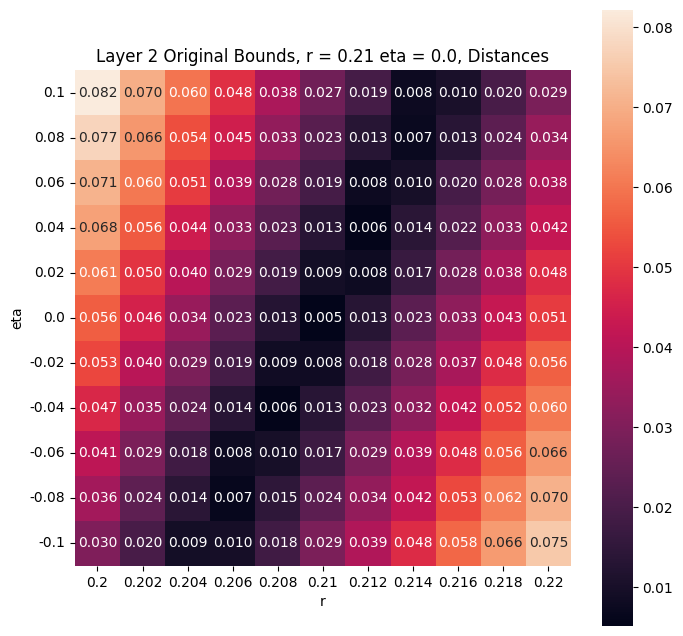

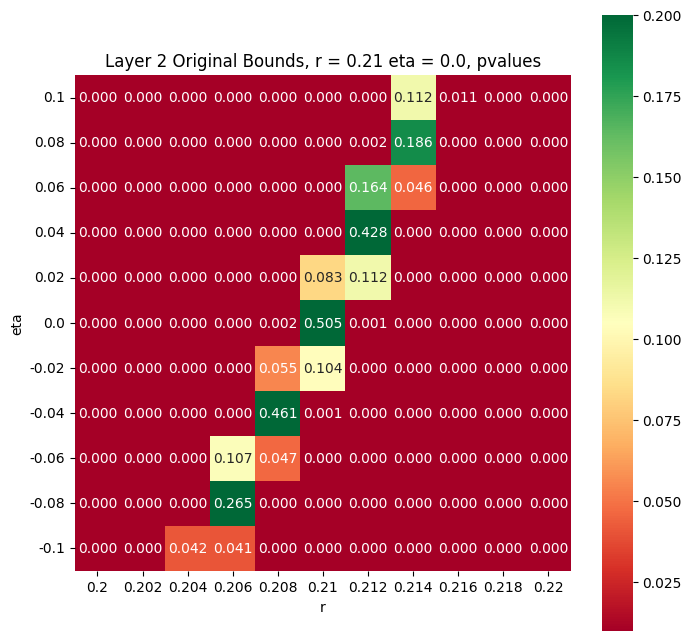

Running process with original bounds
Only 9.917355371900827% of tests passed with the original bounds. Now running with lower r and eta bounds
Trying r_bound = 0.001, eta_bound = 0.001
90.9090909090909% of tests passed using r_bound = 0.001, eta_bound = 0.01. Showing Heatmaps


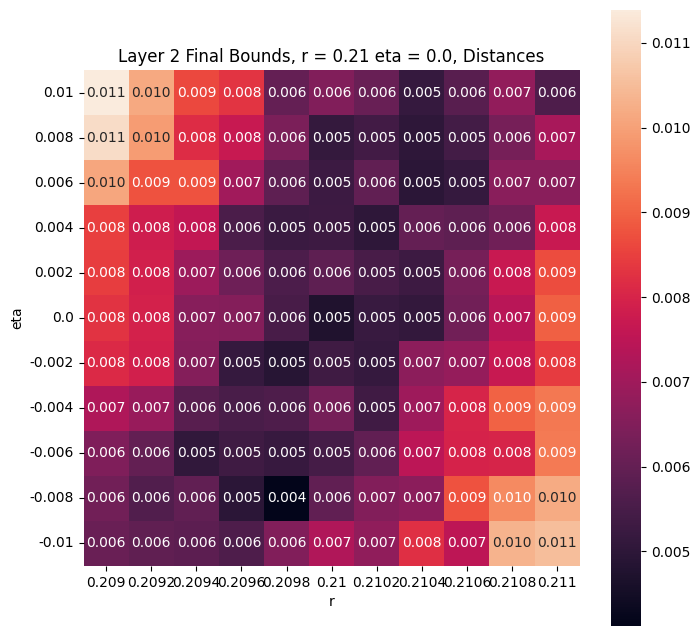

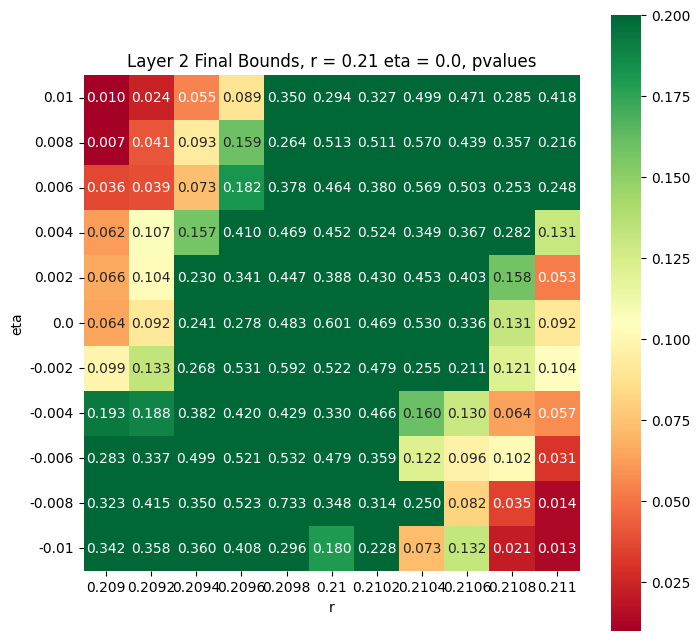

Testing Layer 3
Check Center Square
Center Square Passed


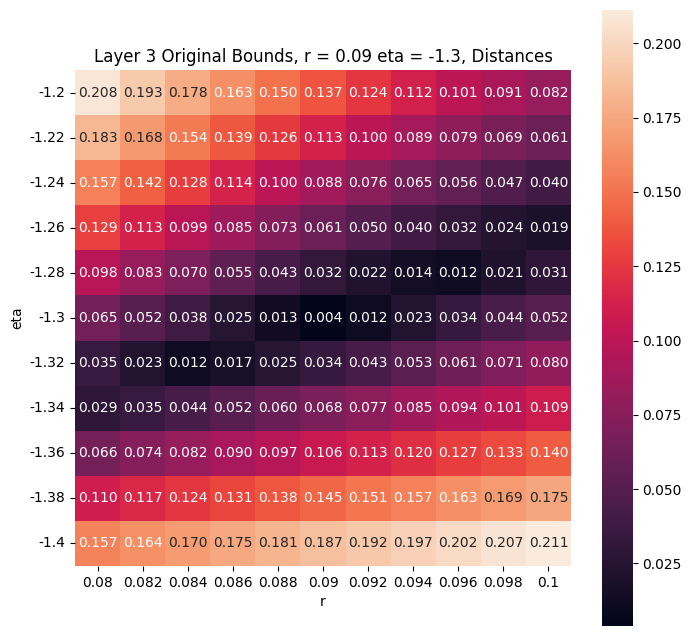

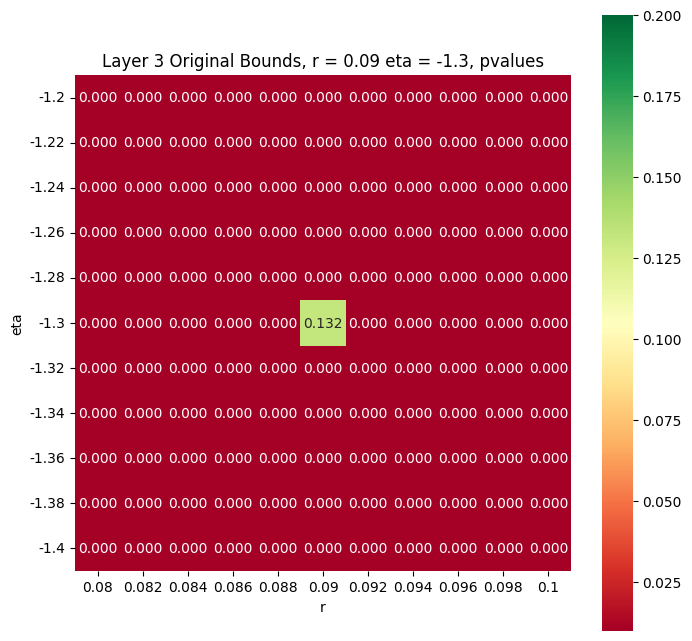

Running process with original bounds
Only 0.8264462809917356% of tests passed with the original bounds. Now running with lower r and eta bounds
Trying r_bound = 0.001, eta_bound = 0.001
Only 14.049586776859504% of tests passed using r_bound = 0.001, eta_bound = 0.01.Now running with lower r and eta bounds
Trying r_bound = 0.0001, eta_bound = 0.0001
98.34710743801654% of tests passed using r_bound = 0.0001, eta_bound = 0.001. Showing Heatmaps


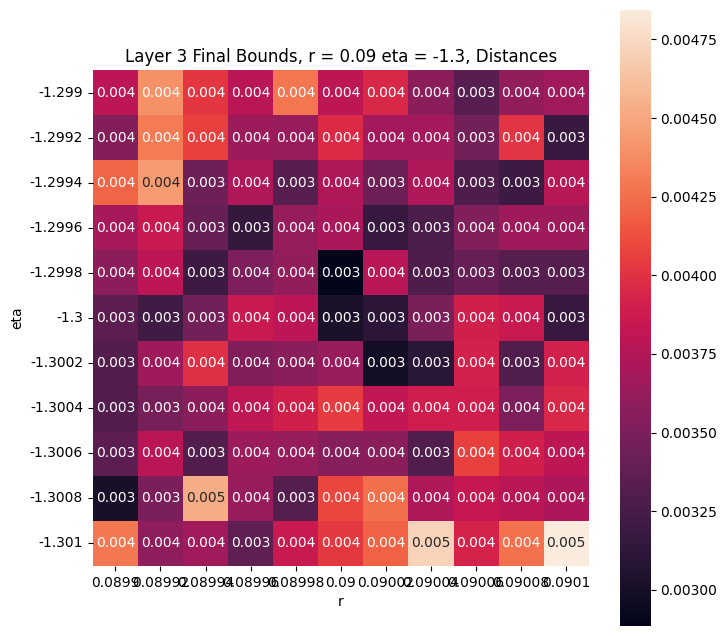

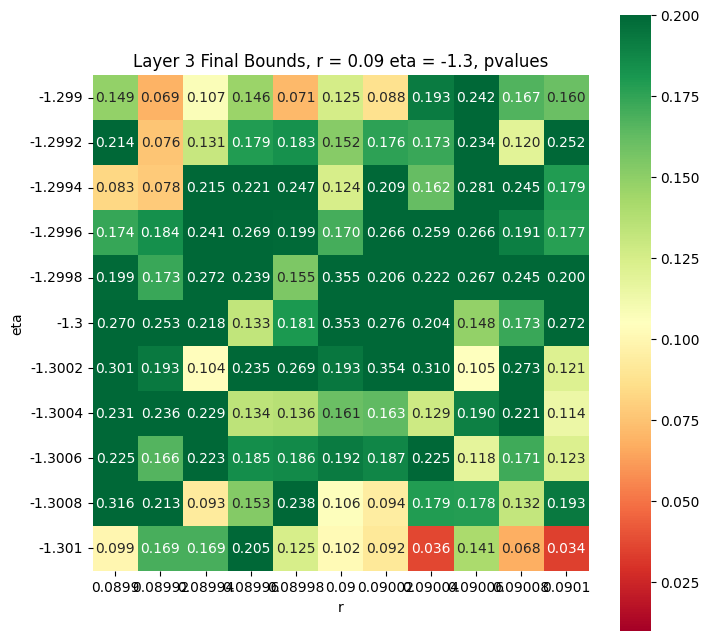

Testing Layer 4
Check Center Square
Center Square Passed


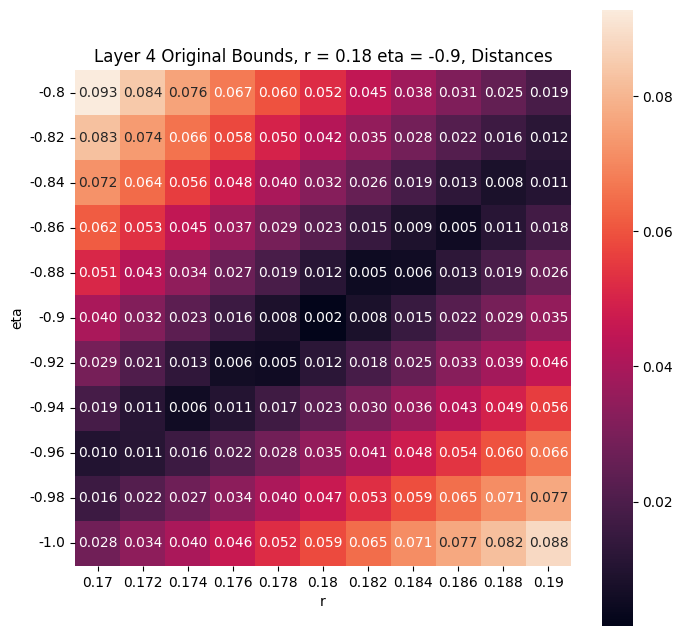

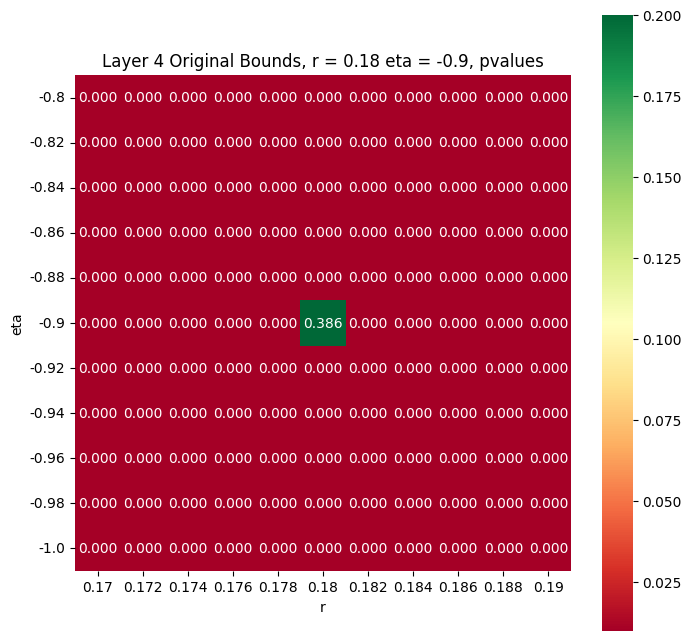

Running process with original bounds
Only 0.8264462809917356% of tests passed with the original bounds. Now running with lower r and eta bounds
Trying r_bound = 0.001, eta_bound = 0.001
Only 26.446280991735538% of tests passed using r_bound = 0.001, eta_bound = 0.01.Now running with lower r and eta bounds
Trying r_bound = 0.0001, eta_bound = 0.0001
100.0% of tests passed using r_bound = 0.0001, eta_bound = 0.001. Showing Heatmaps


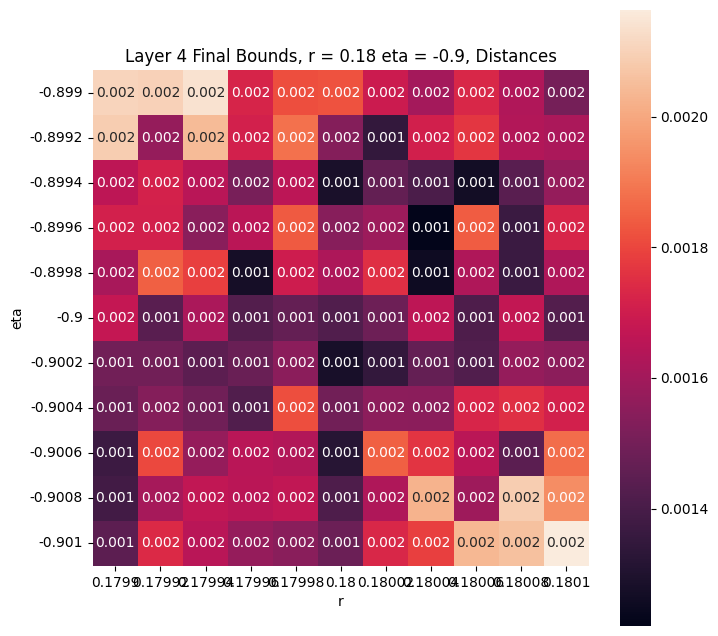

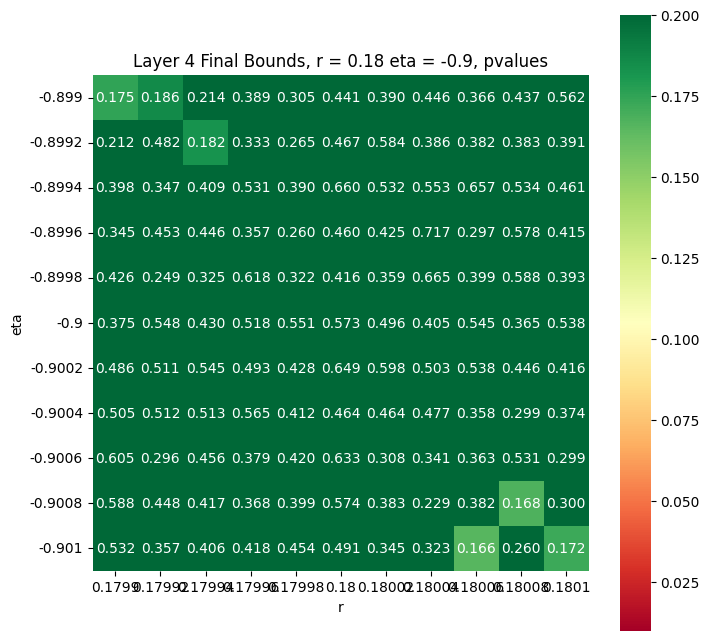

Testing Layer 5
Check Center Square
Center Square Passed


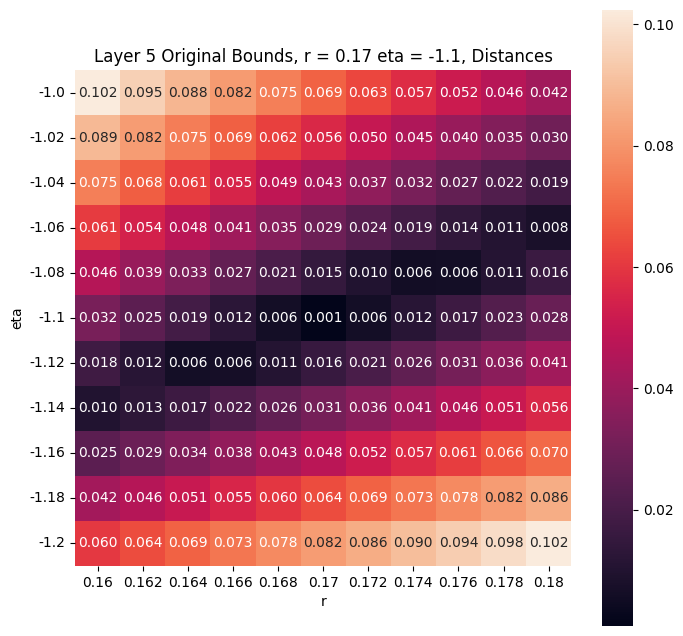

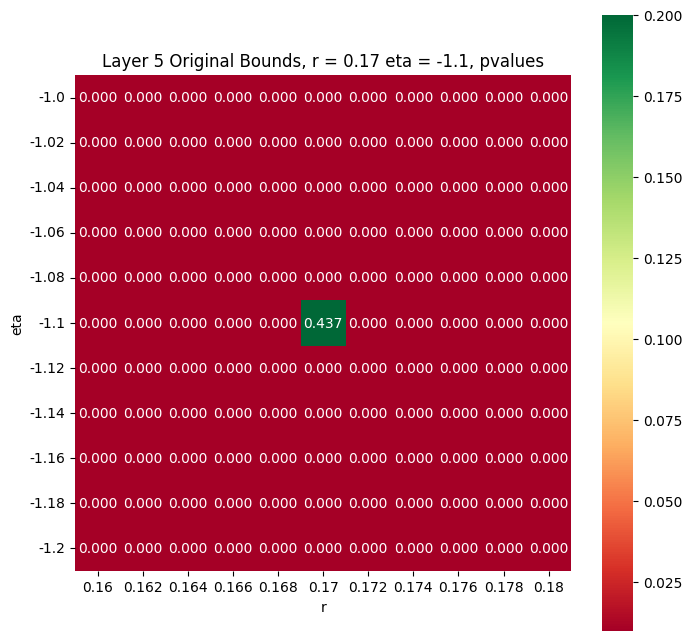

Running process with original bounds
Only 0.8264462809917356% of tests passed with the original bounds. Now running with lower r and eta bounds
Trying r_bound = 0.001, eta_bound = 0.001
Only 6.6115702479338845% of tests passed using r_bound = 0.001, eta_bound = 0.01.Now running with lower r and eta bounds
Trying r_bound = 0.0001, eta_bound = 0.0001
89.25619834710744% of tests passed using r_bound = 0.0001, eta_bound = 0.001. Showing Heatmaps


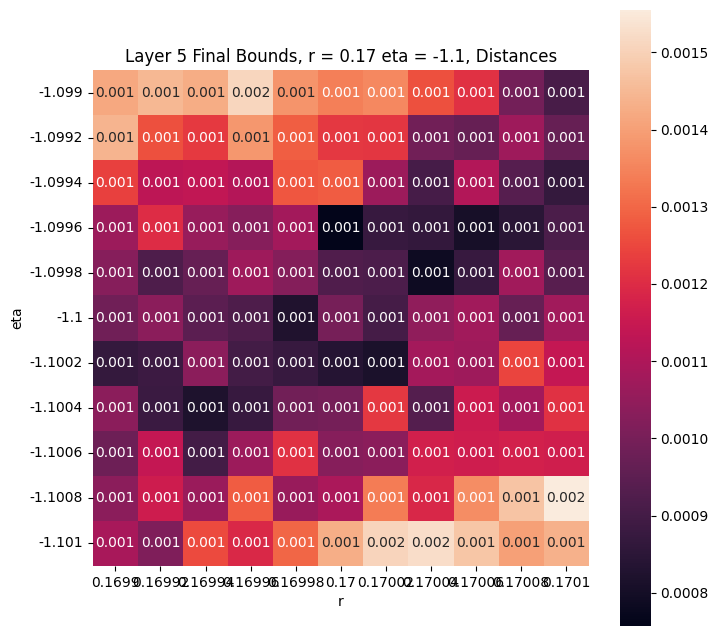

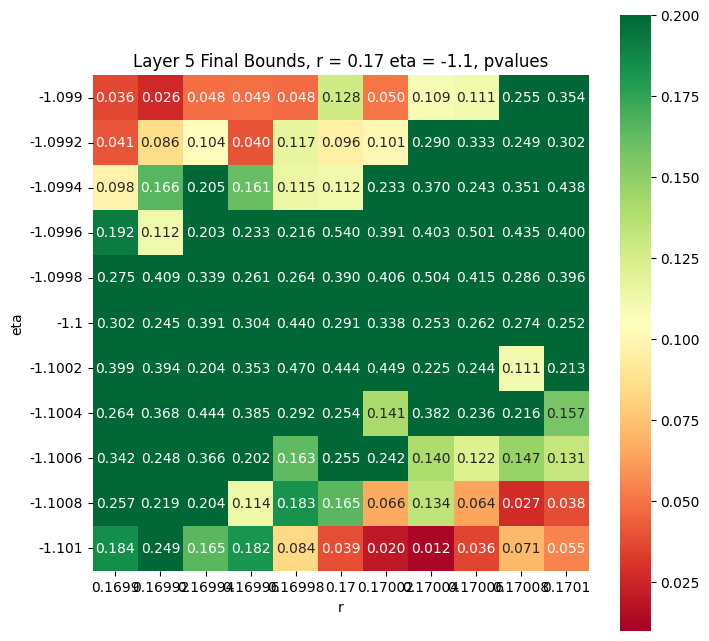

Testing Layer 6
Check Center Square
Center Square Passed


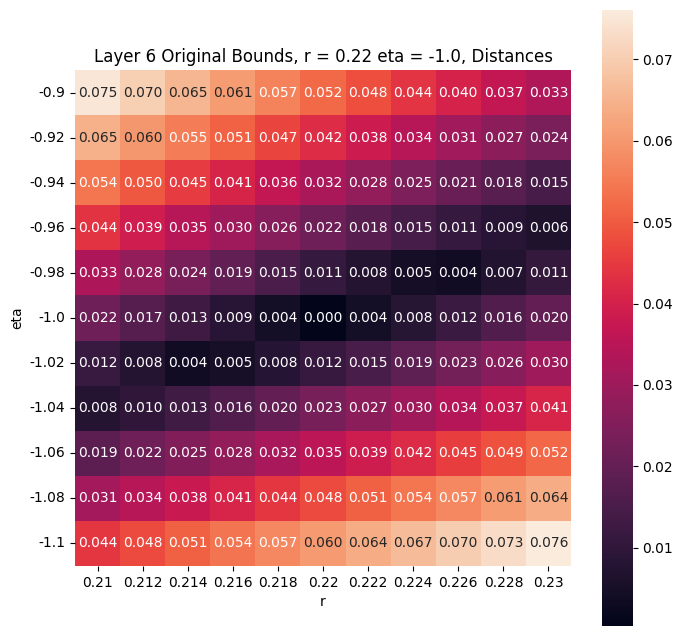

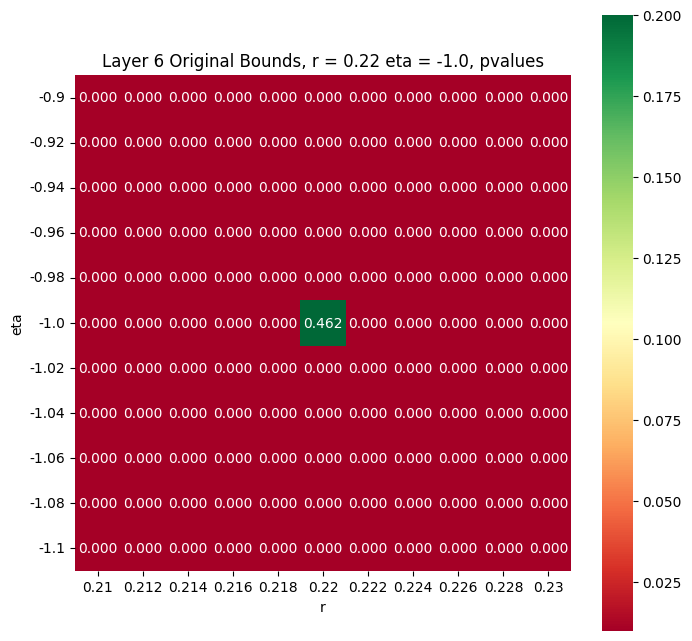

Running process with original bounds
Only 0.8264462809917356% of tests passed with the original bounds. Now running with lower r and eta bounds
Trying r_bound = 0.001, eta_bound = 0.001
Only 4.958677685950414% of tests passed using r_bound = 0.001, eta_bound = 0.01.Now running with lower r and eta bounds
Trying r_bound = 0.0001, eta_bound = 0.0001
Only 72.72727272727273% of tests passed using r_bound = 0.0001, eta_bound = 0.001.Now running with lower r and eta bounds
Trying r_bound = 1e-05, eta_bound = 1e-05
100.0% of tests passed using r_bound = 1e-05, eta_bound = 0.0001. Showing Heatmaps


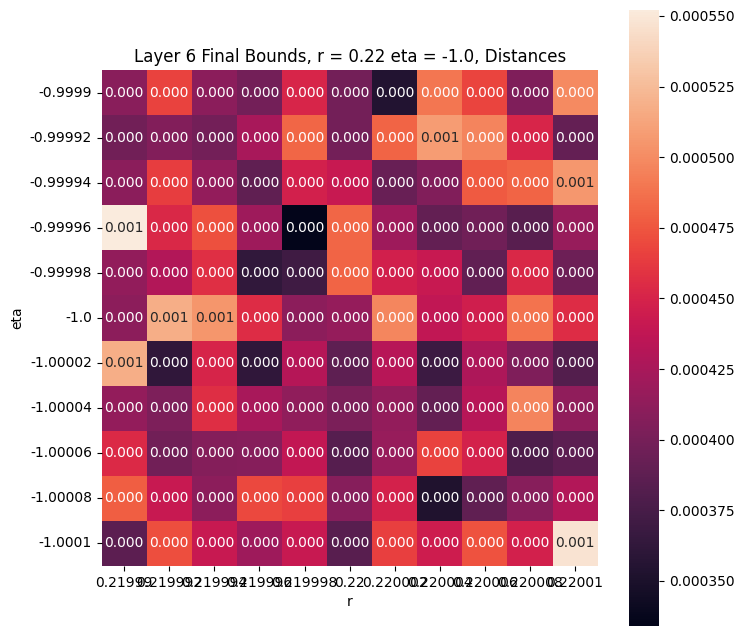

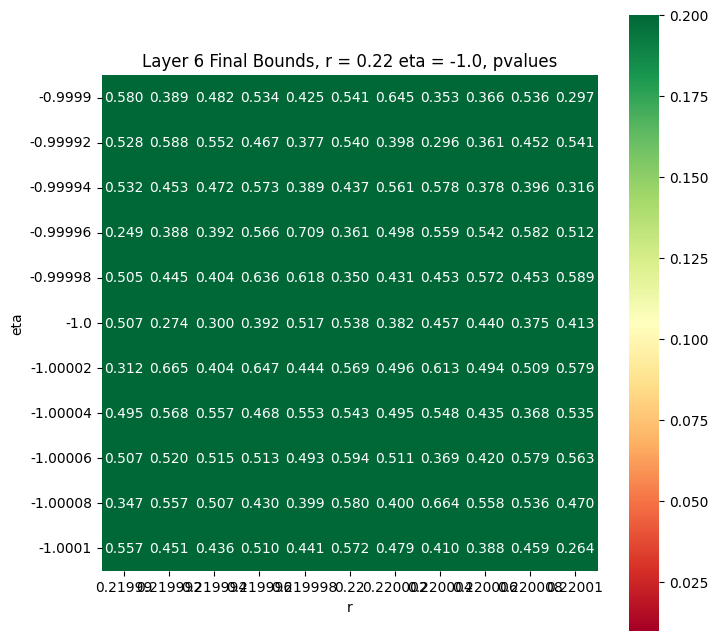

Testing Layer 7
Check Center Square
Center Square Passed


/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


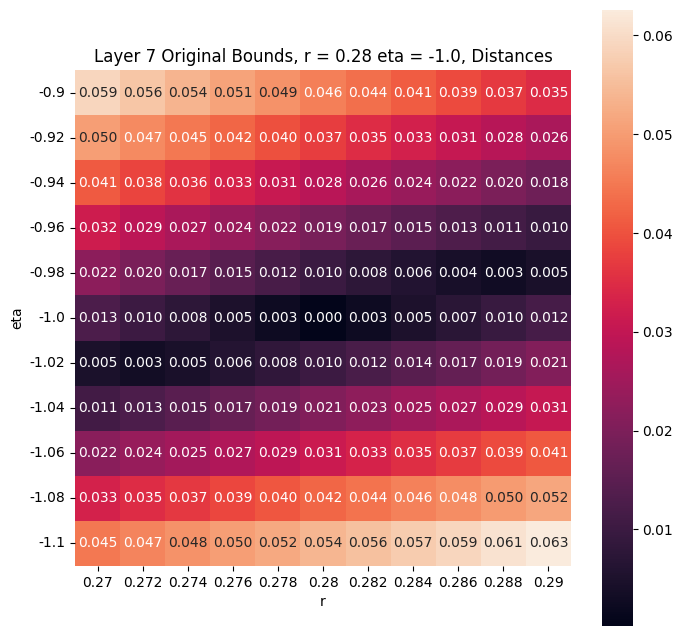

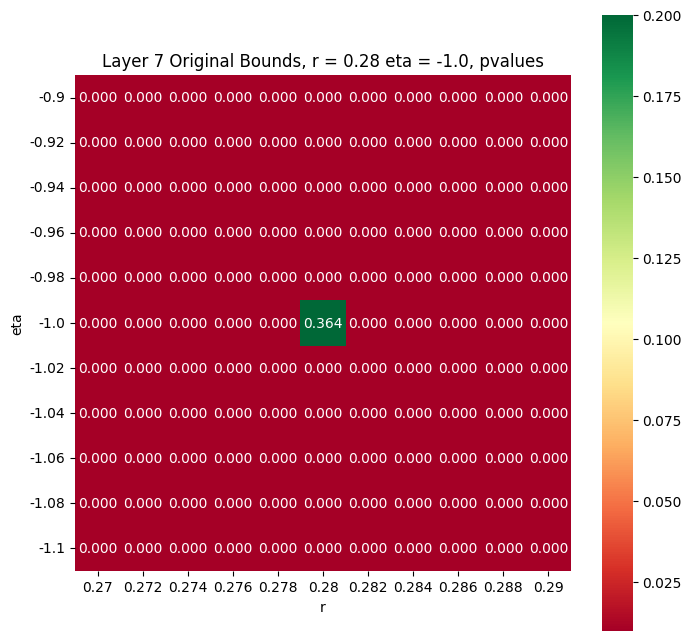

Running process with original bounds
Only 0.8264462809917356% of tests passed with the original bounds. Now running with lower r and eta bounds
Trying r_bound = 0.001, eta_bound = 0.001
Only 1.6528925619834711% of tests passed using r_bound = 0.001, eta_bound = 0.01.Now running with lower r and eta bounds
Trying r_bound = 0.0001, eta_bound = 0.0001
Only 42.14876033057851% of tests passed using r_bound = 0.0001, eta_bound = 0.001.Now running with lower r and eta bounds
Trying r_bound = 1e-05, eta_bound = 1e-05
100.0% of tests passed using r_bound = 1e-05, eta_bound = 0.0001. Showing Heatmaps


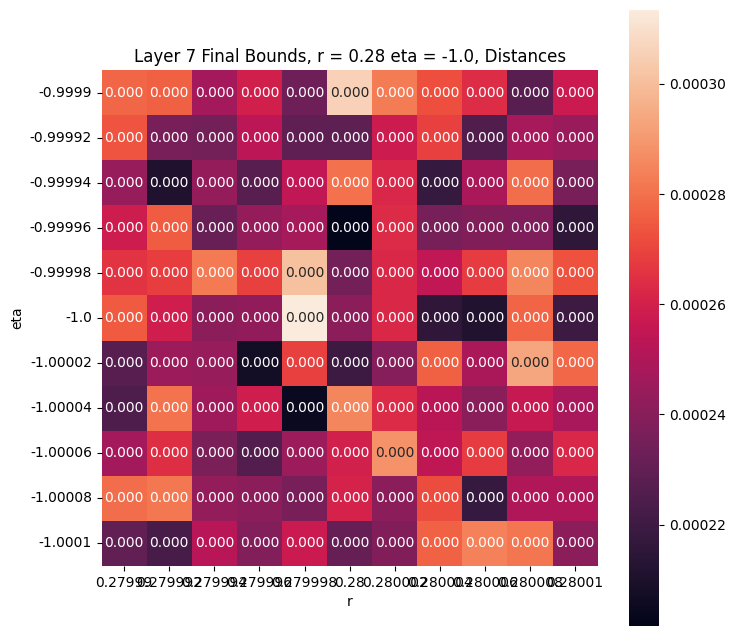

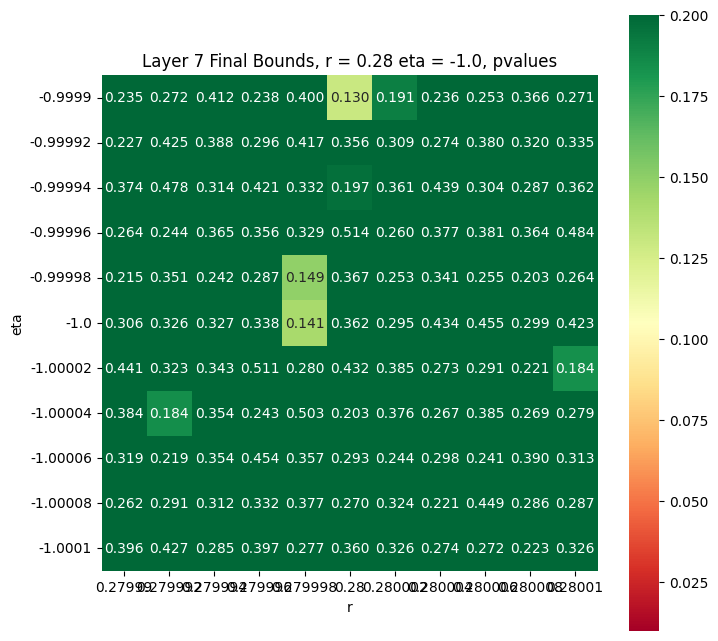

Testing Layer 8
Check Center Square
Center Square Passed


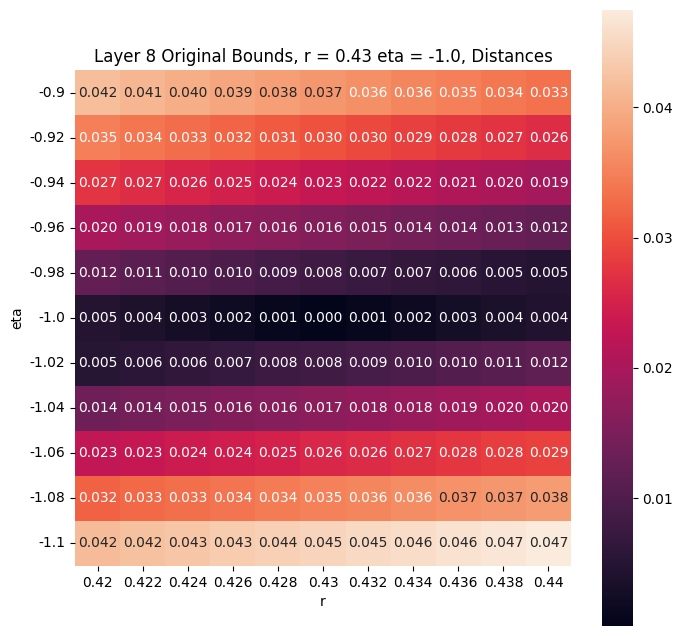

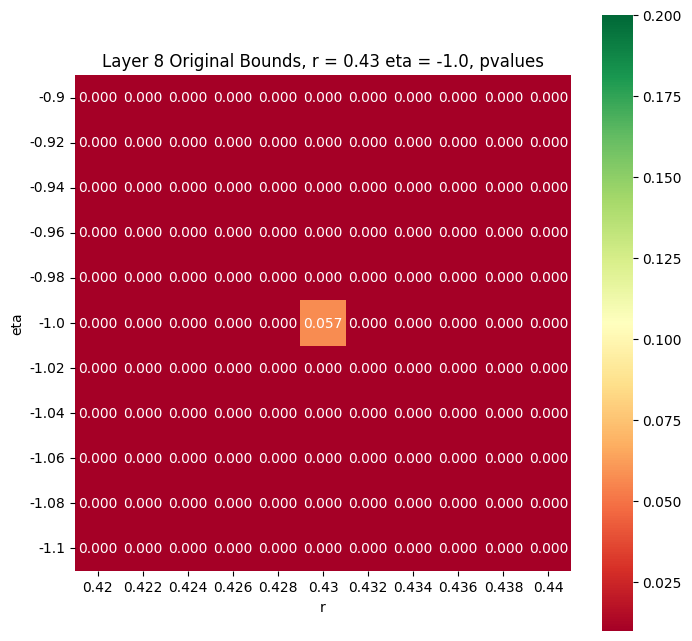

Running process with original bounds
Only 0.8264462809917356% of tests passed with the original bounds. Now running with lower r and eta bounds
Trying r_bound = 0.001, eta_bound = 0.001
Only 0.8264462809917356% of tests passed using r_bound = 0.001, eta_bound = 0.01.Now running with lower r and eta bounds
Trying r_bound = 0.0001, eta_bound = 0.0001
Only 5.785123966942149% of tests passed using r_bound = 0.0001, eta_bound = 0.001.Now running with lower r and eta bounds
Trying r_bound = 1e-05, eta_bound = 1e-05
Only 28.92561983471074% of tests passed using r_bound = 1e-05, eta_bound = 0.0001.Now running with lower r and eta bounds
Trying r_bound = 1.0000000000000002e-06, eta_bound = 1.0000000000000002e-06
Only 32.231404958677686% of tests passed using r_bound = 1.0000000000000002e-06, eta_bound = 1e-05.Now running with lower r and eta bounds
Trying r_bound = 1.0000000000000002e-07, eta_bound = 1.0000000000000002e-07


KeyboardInterrupt: 

In [8]:
sample_max = int(1e7)
ks_output_df_new = pd.DataFrame(columns = ["layer", "inital_r_bound", "inital_eta_bound", "inital_pass_pct", "final_r_bound", "final_eta_bound", "final_pass_pct"])
for group in GROUPS[:-1]:
    print(f"Testing Layer {group}")
    figs, output = KSHeatMapFullProcess(r = full_params.loc[group, 'initial_r'], eta = full_params.loc[group, 'initial_eta'], n = full_params.loc[group, 'total_samples'], ks_max = sample_max, iterations = 10, r_bound = 0.01, eta_bound=0.1, grid_amt = 5, rounded = 8, title = f"Layer {group}", return_vals = True, max_iterations = 5, parallelize = True)
    figs[0][0].figure.savefig(os.path.join(CWD, "plots", "ksplots", f"ks_Plot_layer_{group}_initial_distances.jpg"), bbox_inches = 'tight', dpi=600)
    figs[0][1].figure.savefig(os.path.join(CWD, "plots", "ksplots", f"ks_plot_layer_{group}_initial_dvalues.jpg"), bbox_inches = 'tight', dpi=600)
    figs[1][0].figure.savefig(os.path.join(CWD, "plots", "ksplots", f"ks_plot_layer_{group}_final_distances.jpg"), bbox_inches = 'tight', dpi=600)
    figs[1][1].figure.savefig(os.path.join(CWD, "plots", "ksplots", f"ks_plot_layer_{group}_final_pvalues.jpg"), bbox_inches = 'tight', dpi=600)
    ks_output_df_new.loc[len(ks_output_df_new)] = [group] + output
